In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#split Filename
file = "march_dump_new.xlsx"
filetype = file.split(".")[1]
print('File Type:',filetype)


#File Path 
import os
import os.path
os.chdir( r"C:\Users\ASUS_2017\Desktop")#Path for the file directory

#Read File
def read_file(filetype):
    if filetype=='csv':
        data=pd.read_csv(file)#Read CSV file.
    elif filetype=='xls':
        data=pd.read_excel(file)#Read excel file.
    elif filetype=='xlsx':
        data=pd.read_excel(file)#Read excel file.
    elif filetype=='json':
        data=pd.read_json(file)#Read json file.
    else:
        print('file not found') 
    return data




File Type: xlsx


In [9]:
data=read_file(filetype)
print(data.head(5))

  Br_Code Branch_Desc     Pat_Type   Ref_Desc                   Ref_Name  \
0       1     T.NAGAR  Out Patient        Lab                 SMSH ERODE   
1       1     T.NAGAR  Out Patient        Lab            GLOBAL MEDILABS   
2       1     T.NAGAR  Out Patient        Lab       FATHIMA NURSING HOME   
3       1     T.NAGAR  Out Patient        Lab       FATHIMA NURSING HOME   
4       1     T.NAGAR  Out Patient  Corporate  APEX LABORATORIES PVT LTD   

              Sid_Date Sid_No IP_NO  Reg_Time Amount Other_Charges Discount  \
0  2018-03-01 00:00:00  77749   NaN  08:54:02   1125             0        0   
1  2018-03-01 00:00:00  77750   NaN  09:30:21    150             0        0   
2  2018-03-01 00:00:00  77751   NaN  09:41:18    700             0        0   
3  2018-03-01 00:00:00  77752   NaN  09:42:33    700             0        0   
4  2018-03-01 00:00:00  77753   NaN  09:49:02    599             0        0   

  Paid   Due Gross   Net Refund_Amount    Bill_User Result  \
0    0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 20 columns):
Br_Code          13143 non-null object
Branch_Desc      13143 non-null object
Pat_Type         13143 non-null object
Ref_Desc         13143 non-null object
Ref_Name         13143 non-null object
Sid_Date         13143 non-null object
Sid_No           13143 non-null object
IP_NO            4806 non-null object
Reg_Time         13143 non-null object
Amount           13143 non-null object
Other_Charges    13143 non-null object
Discount         13144 non-null object
Paid             13145 non-null object
Due              13143 non-null object
Gross            13144 non-null object
Net              13144 non-null object
Refund_Amount    13143 non-null object
Bill_User        13143 non-null object
Result           13143 non-null object
Test_Name        13143 non-null object
dtypes: object(20)
memory usage: 2.0+ MB


In [3]:
#Missing Values
missing_value=data.isnull().sum()
print('Total missing values in dataset:')
print(missing_value)

#Drop The Missing Value Rows
data=data.dropna()

Total missing values in dataset:
Br_Code             3
Branch_Desc         3
Pat_Type            3
Ref_Desc            3
Ref_Name            3
Sid_Date            3
Sid_No              3
IP_NO            8340
Reg_Time            3
Amount              3
Other_Charges       3
Discount            2
Paid                1
Due                 3
Gross               2
Net                 2
Refund_Amount       3
Bill_User           3
Result              3
Test_Name           3
dtype: int64


In [4]:
#Find Catagorical Values
cols = data.columns
num_cols = data._get_numeric_data().columns#list of numarical variables
#print('Numaric Data columns:',num_cols)
cat_cols=list(set(cols) - set(num_cols))#List of categorical variables
#print('Categorial Data Columns:',cat_cols)

for i in cat_cols:
     data[i] = pd.Categorical(data[i])#Convert Object Type to Categorical.

print('Info:',data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 894 to 13036
Data columns (total 20 columns):
Br_Code          4806 non-null category
Branch_Desc      4806 non-null category
Pat_Type         4806 non-null category
Ref_Desc         4806 non-null category
Ref_Name         4806 non-null category
Sid_Date         4806 non-null category
Sid_No           4806 non-null category
IP_NO            4806 non-null category
Reg_Time         4806 non-null category
Amount           4806 non-null category
Other_Charges    4806 non-null category
Discount         4806 non-null category
Paid             4806 non-null category
Due              4806 non-null category
Gross            4806 non-null category
Net              4806 non-null category
Refund_Amount    4806 non-null category
Bill_User        4806 non-null category
Result           4806 non-null category
Test_Name        4806 non-null category
dtypes: category(20)
memory usage: 763.8 KB
Info: None


In [5]:


#How to check a variable is continuous or discrete?
   #Values are integers: +.7
   #Values are floats: +.8
   #Values are normally distributed: +.3
   #Values not contain a relatively small number of unique values: +.3
   #Values aren't all the same number of characters: +.1
   #Values don't contain leading zeros: +.1

#Conert Numarical to Categorical Type

def Read_cat(data):
    col_names=data.columns.tolist()
    threshold=0
    cat_var= []
    for i in col_names:
        if data[i].dtype=='int64':
            #print(i)
            threshold = threshold + 0.7
            #from scipy import stats
            #p=stats.shapiro(data[i])[1]
            #if p < 0.05:
             #   threshold = threshold + 0.3
            if len(set(data[i])) > 10:
                threshold = threshold + 0.3
            #print(f'Threshold for {i} is {threshold}')
            if(threshold<=0.7):
                cat_var.append(i)
            threshold = 0
    return cat_var

Numaric_to_Categorical = Read_cat(data)
print('New Categorical variable:',Numaric_to_Categorical)
#Convert Datatype name to categorical
for i in Numaric_to_Categorical:
    data[i] = pd.Categorical(data[i])

New Categorical variable: []


In [12]:
#Find Final Number of Catagorical Values
num_cols = data._get_numeric_data().columns#list of numarical variables
print('Numaric Data columns:',num_cols)
cat_cols=list(set(cols) - set(num_cols))#List of categorical variables
print('Categorial Data Columns:',cat_cols)



Numaric Data columns: Index([], dtype='object')
Categorial Data Columns: ['Other_Charges', 'Br_Code', 'Sid_Date', 'Due', 'Sid_No', 'Ref_Desc', 'Gross', 'Paid', 'Net', 'Refund_Amount', 'Pat_Type', 'Amount', 'Test_Name', 'Ref_Name', 'Reg_Time', 'Discount', 'Bill_User', 'Result', 'Branch_Desc', 'IP_NO']


In [13]:

#Generate discriptive Staistics:Mean Standard_Deviation Range Count
print(data.describe())

        Br_Code Branch_Desc     Pat_Type Ref_Desc    Ref_Name  \
count     13143       13143        13143    13143       13143   
unique       11          11            3        7         287   
top          15  ERODE-SMSH  Out Patient   Doctor  N.SELVARAJ   
freq       2999        2999         8337    10501        1129   

                   Sid_Date  Sid_No       IP_NO  Reg_Time  Amount  \
count                 13143   13143        4806     13143   13143   
unique                   32   12670        1225     11467     703   
top     2018-03-26 00:00:00   25627  9965856892  15:51:09      50   
freq                    622       2         189        56    1174   

        Other_Charges  Discount   Paid    Due  Gross    Net  Refund_Amount  \
count           13143     13144  13145  13143  13144  13144          13143   
unique              3        83    472    575    704    713             24   
top                 0         0      0      0     50     50              0   
freq            

In [20]:
data.shape

(13146, 20)

In [15]:
#Mean(dataframes)
data_mean= data.mean()
Data_mean = pd.DataFrame(data_mean)

In [16]:
#Median(dataframes)
data_median=data.median()
Data_median=pd.DataFrame(data_median)


In [17]:
#print mean and median for numarical values
for i in num_cols:
    m=Data_mean.loc[i].tolist()
    print("Mean for {0} is {1}.".format(i, m))
    n=Data_median.loc[i].tolist()
    print("Median for {0} is {1}.".format(i, n))    

In [18]:
#DataFrame for modes    
data_Mode=data.mode()
data_Mode=data_Mode.T
Data_Mode=pd.DataFrame(data_Mode)
Data_Mode=Data_Mode.iloc[:,0:1]
#print mode for all the dataset variablesDData_Mode=Data_Mode.iloc[:,0:1]ata_Mode=Data_Mode.iloc[:,0:1]
for i in cat_cols:
    z=Data_Mode.loc[i].tolist()
    print("Mode for {0} is {1}.".format(i, z))  

Mode for Other_Charges is [0].
Mode for Br_Code is [15].
Mode for Sid_Date is [Timestamp('2018-03-26 00:00:00')].
Mode for Due is [0].
Mode for Sid_No is [25609].
Mode for Ref_Desc is ['Doctor'].
Mode for Gross is [50].
Mode for Paid is [0].
Mode for Net is [50].
Mode for Refund_Amount is [0].
Mode for Pat_Type is ['Out Patient'].
Mode for Amount is [50].
Mode for Test_Name is ['BLOOD GLUCOSE ( F ), BLOOD GLUCOSE ( PP )'].
Mode for Ref_Name is ['N.SELVARAJ'].
Mode for Reg_Time is [datetime.time(15, 51, 9)].
Mode for Discount is [0].
Mode for Bill_User is ['SMSH billing'].
Mode for Result is ['PAID'].
Mode for Branch_Desc is ['ERODE-SMSH'].
Mode for IP_NO is [9965856892].


Variable_name: Other_Charges


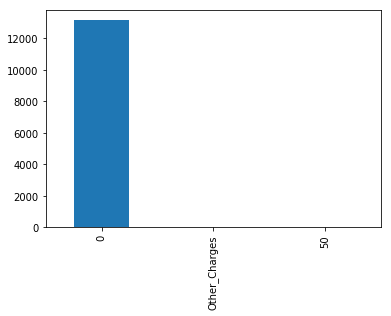

Variable_name: Br_Code


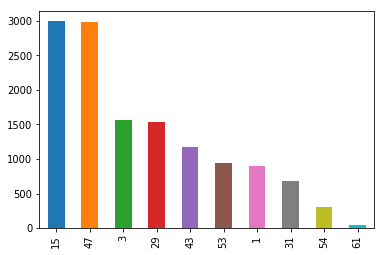

Variable_name: Sid_Date


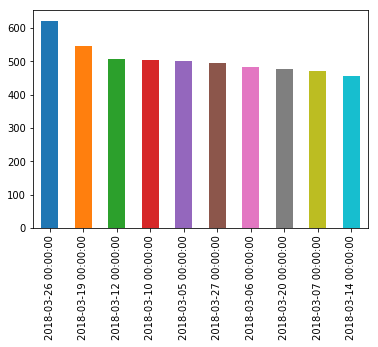

Variable_name: Due


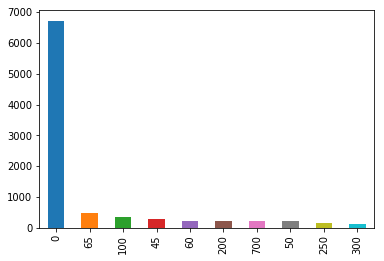

Variable_name: Sid_No


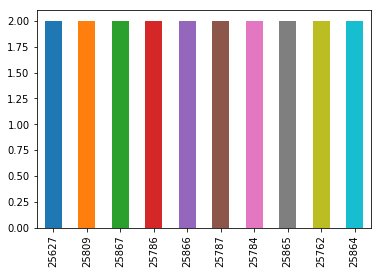

Variable_name: Ref_Desc


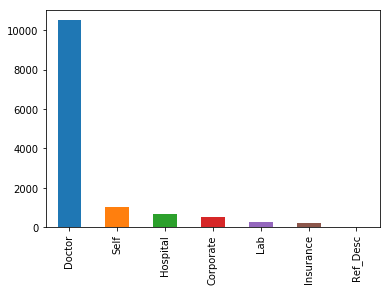

Variable_name: Gross


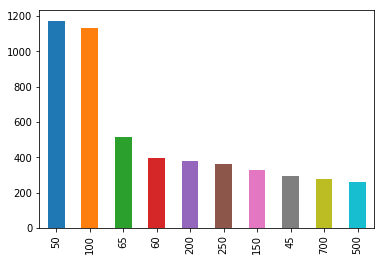

Variable_name: Paid


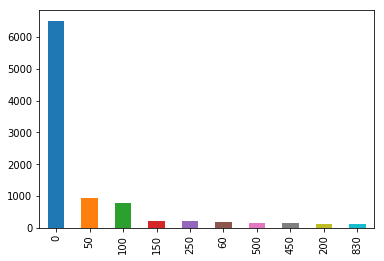

Variable_name: Net


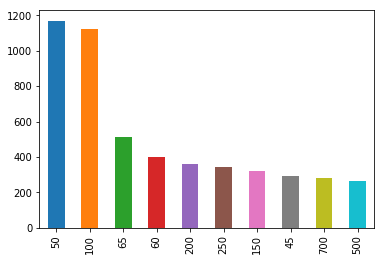

Variable_name: Refund_Amount


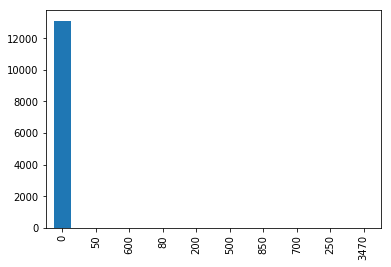

Variable_name: Pat_Type


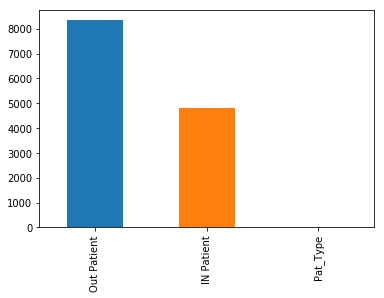

Variable_name: Amount


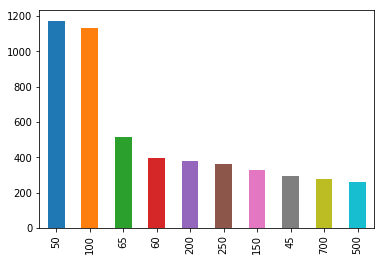

Variable_name: Test_Name


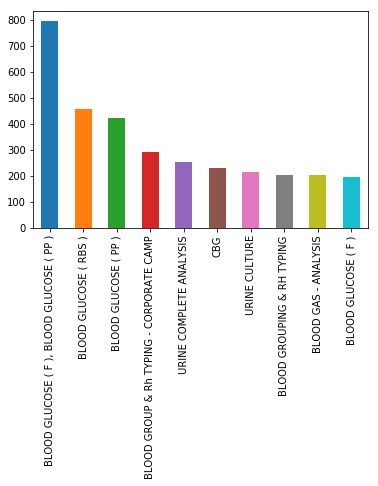

Variable_name: Ref_Name


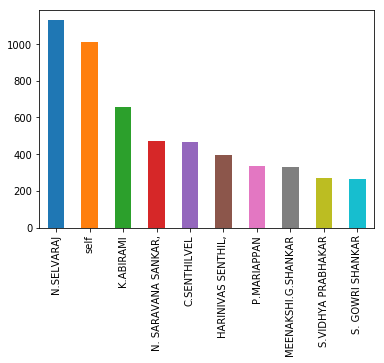

Variable_name: Reg_Time


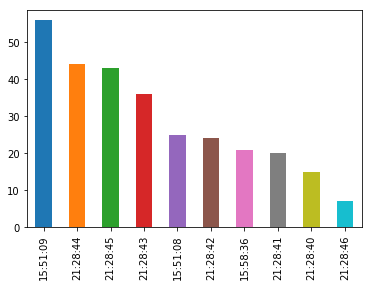

Variable_name: Discount


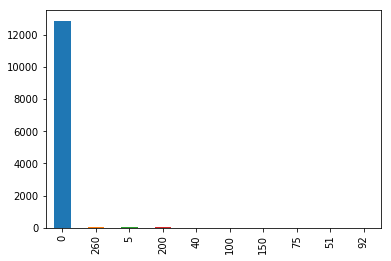

Variable_name: Bill_User


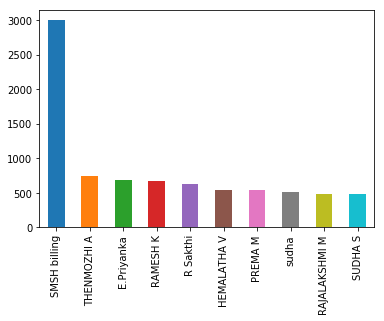

Variable_name: Result


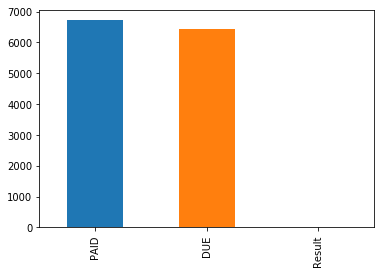

Variable_name: Branch_Desc


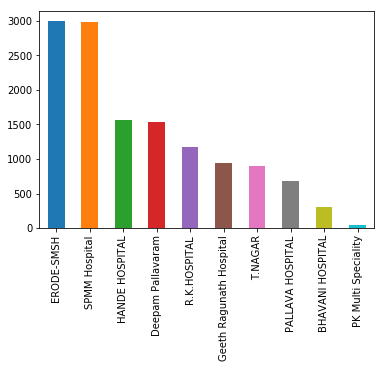

Variable_name: IP_NO


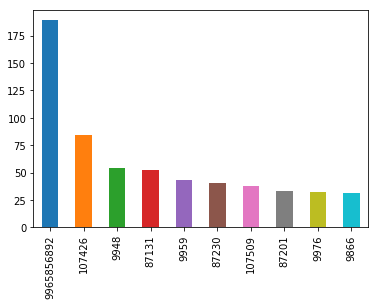

In [19]:
#Visulization
#Box_plot:- Numarical Values
for i in num_cols:
    print('Variable_name:',i)
    #Histogram Plot
    data[i].hist()
    plt.show()
    #Box Plot
    data[i].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
    plt.show()
    #Density Plot:-Numarical Values
    data[i].plot.kde()
    plt.show()
    #Scatter Matrix Plot 
    scatter_matrix(data, alpha=0.2, figsize=(16, 16), diagonal='kde')
    plt.show()
#Bar_plot:-Categorical values
for i in cat_cols:
    print('Variable_name:',i)
    data[i].value_counts().head(10).plot.bar()
    plt.show()
